In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

In [2]:
from tensorflow import keras

In [3]:
import tensorflow as tf
print(tf.test.gpu_device_name())

In [4]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Melanoma_escalado','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Carcinoma_escalado','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [5]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [6]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")

en total tenemos: 12279 imagenes dentro de la carpeta train


In [7]:
porcion1=dataTr[0:7000]
porcion2=dataTr[7001:10001]
print("para entrenamiento tendremos: "+str(len(porcion1))+ " imagenes de la carpeta de train")
print("para prueba tendremos: "+str(len(porcion2))+ " imagenes de la carpeta de train")

para entrenamiento tendremos: 7000 imagenes de la carpeta de train
para prueba tendremos: 3000 imagenes de la carpeta de train


In [8]:
x_e,y_e=particion(porcion1)
x_p,y_p=particion(porcion2)

In [9]:
def validacion(x_e,y_e,x_p,y_p,modelo1,epocas):
    entre=modelo1.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=modelo1.evaluate(x_p,y_p)
    return a[1]

In [10]:
def evaluacion(modelo1,porcentaje,nombre,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo1,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break 

In [11]:
modelo=Sequential()
modelo.add(Convolution2D(8,(3,3),input_shape=(224,224,3),activation='relu'))
modelo.add(Convolution2D(16,(3,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(70,activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))
modelo.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 16)      1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
flatten (Flatten)            (None, 193600)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               24780928  
_________________________________________________________________
dense_1 (Dense)              (None, 70)                9030      
_________________________________________

In [ ]:
modelo_adam = keras.optimizers.Adam(learning_rate=0.0008)
modelo.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
v_eA=[]
v_aA=[]
evaluacion(modelo,81,"ADAM",v_eA,v_aA)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.7529 - acc: 0.6150
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.6975 - acc: 0.6510
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.6798 - acc: 0.6940
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.7344 - acc: 0.7090
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.8661 - acc: 0.6443
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 0.8491 - acc: 0.6880
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================]

3000/3000 [==============================] - 5s 2ms/sample - loss: 2.4265 - acc: 0.6713
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 2.4417 - acc: 0.7147
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 2.7109 - acc: 0.7010
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 2.0064 - acc: 0.6910
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 2.1915 - acc: 0.6877
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 2.6601 - acc: 0.7107
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 2ms/sample - loss: 2.4648 - acc: 0.6990
Train on 7000 samples, validate on 3000 samples
3000/3000 [==============================] - 5s 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_9628\3522865077.py", line 5, in <module>
    evaluacion(modelo,81,"ADAM",v_eA,v_aA)
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_9628\1593769438.py", line 6, in evaluacion
    prediccion=(validacion(x_e,y_e,x_p,y_p,modelo1,1))*100
  File "C:\Users\Desktop\AppData\Local\Temp\ipykernel_9628\2085629365.py", line 2, in validacion
    entre=modelo1.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 727, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\Desktop\.conda\envs\tesis\lib\site-packages\tensorflow_core\python\keras\engine\training_arrays.py", line 675, in fit
    step

In [14]:
modelo.save("D:/UMSA/Documentos/CNN cancer de piel/MODELOS/10000_2/modelo")

In [15]:
modelo.save_weights("D:/UMSA/Documentos/CNN cancer de piel/PESOS/10000_2/modelo_pesos")

In [16]:
count=1
print("# de EPOCAS     Valor del Accuracy")
print("----------------------------------")
for i in v_aA:
    print("epoca ",count," => ",i)
    count +=1

# de EPOCAS     Valor del Accuracy
----------------------------------
epoca  1  =>  64.3999993801117
epoca  2  =>  58.399999141693115
epoca  3  =>  60.866665840148926
epoca  4  =>  69.33333277702332
epoca  5  =>  69.9999988079071
epoca  6  =>  70.26666402816772
epoca  7  =>  74.59999918937683
epoca  8  =>  75.40000081062317
epoca  9  =>  75.66666603088379
epoca  10  =>  76.06666684150696
epoca  11  =>  76.66666507720947
epoca  12  =>  77.13333368301392
epoca  13  =>  76.5333354473114
epoca  14  =>  76.99999809265137
epoca  15  =>  76.8666684627533
epoca  16  =>  77.60000228881836
epoca  17  =>  78.20000052452087
epoca  18  =>  78.20000052452087
epoca  19  =>  78.66666913032532
epoca  20  =>  77.46666669845581
epoca  21  =>  78.4666657447815
epoca  22  =>  78.60000133514404
epoca  23  =>  78.66666913032532
epoca  24  =>  78.66666913032532
epoca  25  =>  79.00000214576721
epoca  26  =>  78.86666655540466
epoca  27  =>  79.00000214576721
epoca  28  =>  78.73333096504211
epoca  29  =>  78.

In [17]:
%matplotlib inline
import matplotlib.pyplot as mp

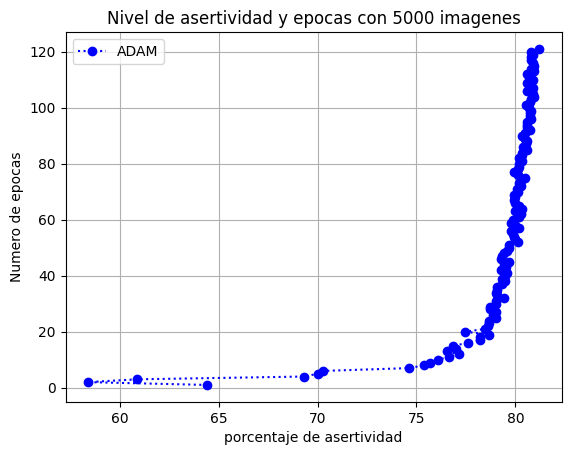

In [18]:
mp.plot(v_aA,v_eA, marker='o', linestyle=':', color='b', label = "ADAM")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad y epocas con 5000 imagenes")
mp.grid(True)
mp.show()

## Curva ROC

In [19]:
lr_probs = modelo.predict_proba(x_p)

In [20]:
lr_probs = lr_probs[:, 0]

In [21]:
ns_probs = [0 for _ in range(len(y_p))]

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ERROR! Session/line number was not unique in database. History logging moved to new session 1091


In [27]:
# Calculamos el AUC
ns_auc = roc_auc_score(y_p, ns_probs)
lr_auc = roc_auc_score(y_p, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Red Neuronal: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Red Neuronal: ROC AUC=0.862


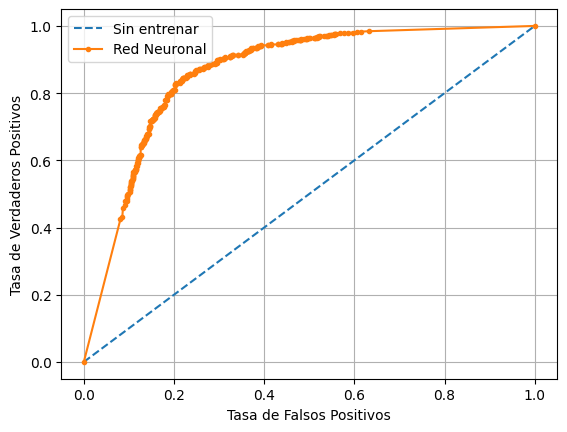

In [38]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_p, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_p, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Red Neuronal')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
mp.grid(True)
pyplot.show()

## SENSIBILIDAD Y PRESICION

In [30]:
lr_probs = modelo.predict_proba(x_p)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 0]

In [31]:
yhat = modelo.predict(x_p)

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [34]:
lr_precision, lr_recall, _ = precision_recall_curve(y_p, lr_probs)

In [35]:
lr_auc =  auc(lr_recall, lr_precision)

In [36]:
no_skill = len(y_p[y_p==1]) / len(y_p)

Redes neuronales: auc=0.851


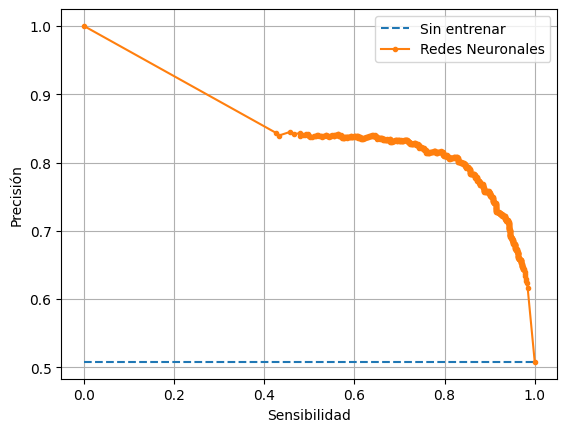

In [39]:
print('Redes neuronales: auc=%.3f' % (lr_auc))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Redes Neuronales')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [41]:
modelo.weights

[<tf.Variable 'conv2d_2/kernel:0' shape=(3, 3, 3, 8) dtype=float32>,
 <tf.Variable 'conv2d_2/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 8, 16) dtype=float32>,
 <tf.Variable 'conv2d_3/bias:0' shape=(16,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(193600, 128) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_4/kernel:0' shape=(128, 70) dtype=float32>,
 <tf.Variable 'dense_4/bias:0' shape=(70,) dtype=float32>,
 <tf.Variable 'dense_5/kernel:0' shape=(70, 1) dtype=float32>,
 <tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32>]